## Flight Ticket Price Prediction

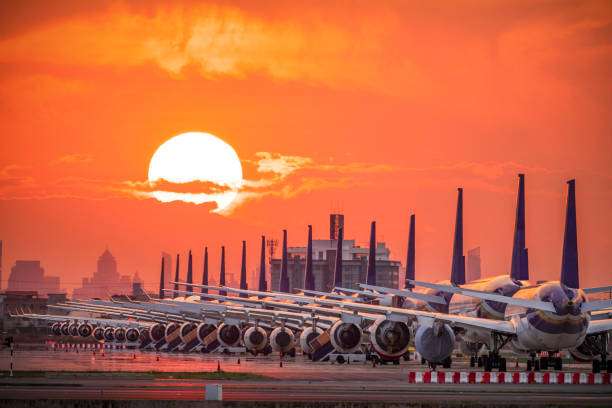

# Business Understanding

The flight ticket price in India is based on demand and supply model with few restrictions on pricing from regulatory bodies. It is often perceived as unpredictable and , recent dynamic pricing scheme added to the confusion.

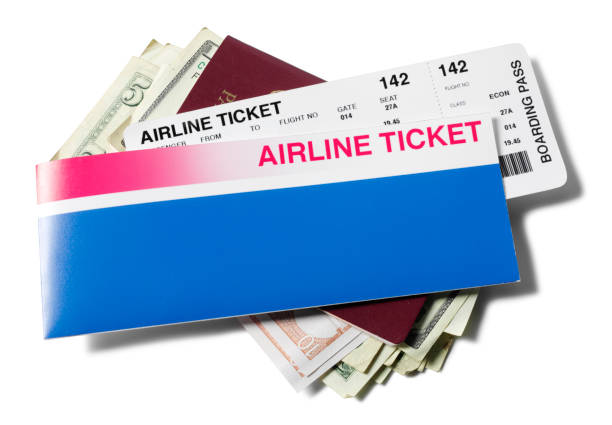

# Importing libraries

In [1]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
data = pd.read_excel("C:\\Users\\manne\\Downloads\\Projects DS\\Data_Train.xlsx")

# Data Analysis

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


 first of all, that we need to convert a lot off feauters into numeric once later on so mechine learining alogrithms can process them 

In [4]:
data.shape

(10683, 11)

In [5]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Here we can see the how many columns are there in given data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Checking Null Values

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

2 missing values

##### As less null values, i can drop here

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [11]:
# we can see types of data
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Types of data we have 

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [14]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
data['Airline'].nunique()

12

### From discription we can see Date_of_Journey is a object data type

-Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.

-dt.day method will extract only day of that date

-dt.month method will extract only month of that date

In [17]:
# Defining function to convert ['Date_of_Journey','Dep_Time', 'Arrival_Time'] to datatype
def change_into_datetime(col):
         data[col]=pd.to_datetime(data[col])

In [18]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

we converted the object to datetime 

In [20]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

we extracted here Date, Time from  Date_of_Journey

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-17 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-17 05:50:00,2022-05-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-17 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-17 18:05:00,2022-05-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-17 16:50:00,2022-05-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [22]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-17 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-17 05:50:00,2022-05-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-17 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-17 18:05:00,2022-05-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-17 16:50:00,2022-05-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


### extract values from [Dep_Time , Arrival_Time] columns
extrct function use to extract the hour and minute

In [24]:
# to extract_hour function
def extract_hour(data,col):
    data[col+"_hour"]=data[col].dt.hour

#to extract_minute function
def extract_min(data,col):
    data[col+"_minute"]=data[col].dt.minute

#to extract_second function
def extract_sec(data,col):
    data[col+'_second']=data[col].dt.second

In [25]:
extract_hour(data,'Dep_Time')
extract_min(data,'Dep_Time')
extract_sec(data,'Dep_Time')

we extracted here Hour, Minute and Second from Dep_Time

In [26]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Dep_Time_second'],
      dtype='object')

In [27]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Dep_Time_second
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-17 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-17 05:50:00,2022-05-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-17 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-17 18:05:00,2022-05-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-17 16:50:00,2022-05-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,0


In [28]:
data.drop('Dep_Time',axis=1,inplace=True)
data.drop('Dep_Time_second',axis=1,inplace=True)

In [29]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [30]:
extract_hour(data,'Arrival_Time')
extract_min(data,'Arrival_Time')
extract_sec(data,'Arrival_Time')

In [31]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_second
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,0


In [32]:
data.drop('Arrival_Time',axis=1,inplace=True)
data.drop('Arrival_Time_second',axis=1,inplace=True)

we extracted here Hour, Minute and Second from Arrival_Time

In [33]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [34]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [35]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [36]:
print('Duration:-unique')
data['Duration'].unique

Duration:-unique


<bound method Series.unique of 0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object>

In [37]:
print('Duration:-nunique')
data['Duration'].nunique()

Duration:-nunique


368

### using srt function to replace Duration

In [38]:
data["Duration"]=data["Duration"].str.replace("h","*60").str.replace(" ","*1").str.replace("m","1").apply(eval)

In [39]:
data['Duration']=pd.to_numeric(data['Duration'])  

In [40]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,180120,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,525420,2 stops,No info,7662,5,1,5,50,13,15


In [41]:
data.drop('Duration',axis=1,inplace=True)

Duration coverts object to integer format and deleted the column

In [42]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15


In [43]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
dtype: object

In [44]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [46]:
data['Total_Stops'].nunique()

5

In [47]:
Total_Stops=(data['Total_Stops']).head()

In [48]:
Total_Stops

0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop
Name: Total_Stops, dtype: object

In [49]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [51]:
data['Additional_Info'].nunique()

10

In [52]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15


In [53]:
data['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [54]:
data['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [55]:
data['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [56]:
data['Price'].nunique()

1870

In [57]:
data[data['Price']==data['Price'].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,3,1,5,45,11,25


In [58]:
data[data['Price']==data['Price'].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,22,45,0,10
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,22,45,0,10
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,4,3,22,45,0,15
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,5,45,7,5


In [59]:
data.describe()

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

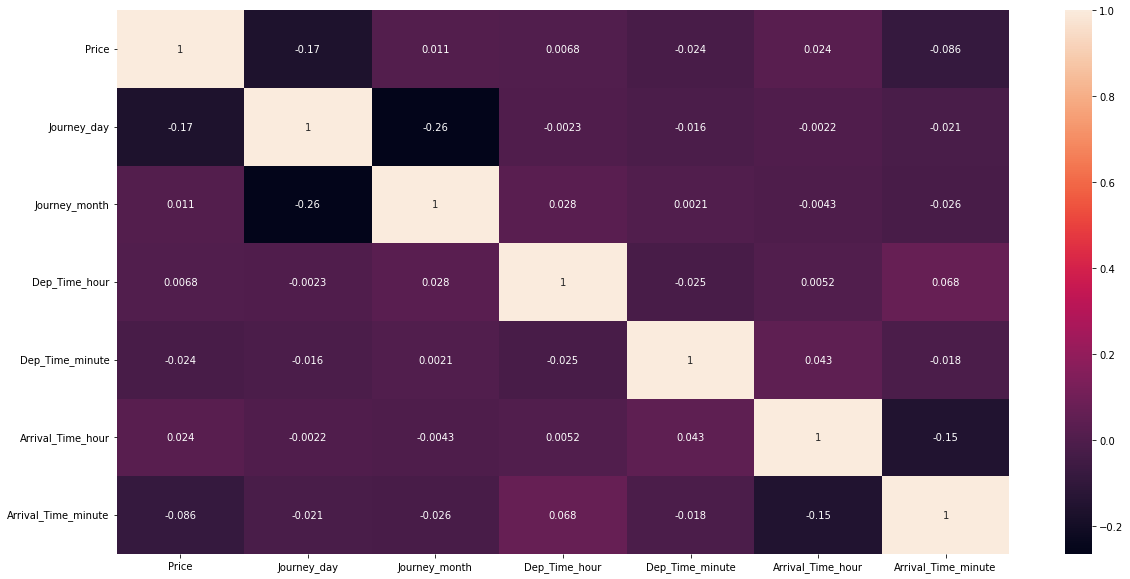

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

## Extracting Numarical & categorical columns

In [61]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

In [62]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

#### Categorical Data into some numarical data


Nominal data --> data are not in any order --> OneHotEncoder is used in this case                                               
Ordinal data --> data are in order --> LabelEncoder is used in this case

In [63]:
categorical=data[cat_features]

In [64]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [65]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

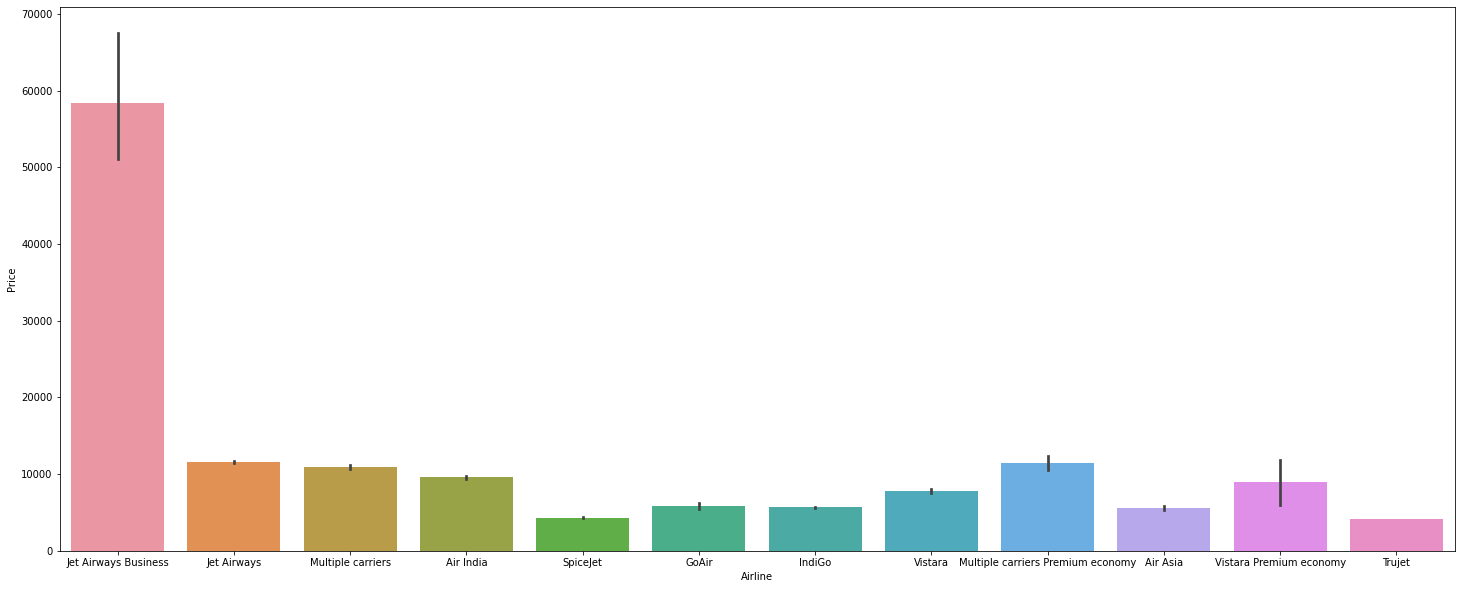

In [66]:
plt.figure(figsize=(25,10))
sns.barplot(y='Price',x='Airline',data = data.sort_values('Price',ascending=False));

#### barplot using to show the Price and Airline comparsion

In [67]:
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)

In [68]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [69]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

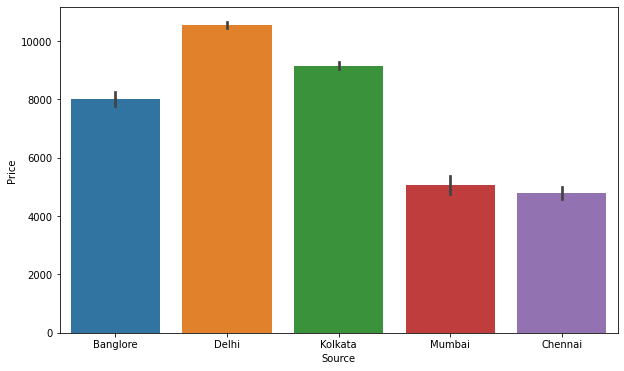

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False));

#### barplot using to show the Price and Source comparision

In [71]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)

In [72]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [73]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

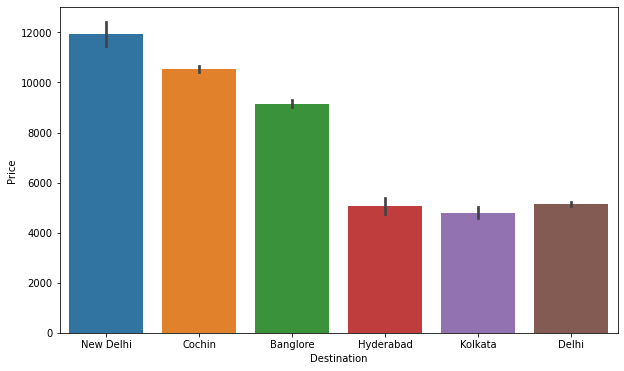

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False));

#### barplot using to show the Price and Destination

In [75]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)

In [76]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [77]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [78]:
categorical['Additional_Info']=categorical['Additional_Info'].replace({'No info':'No info'},inplace=True)

In [79]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,None


In [80]:
categorical.drop(columns='Additional_Info',axis=1,inplace=True)

In [81]:
categorical.head(1)

,Airline,Source,Destination,Route,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop


In [82]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [83]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [84]:
categorical.drop(columns="Route",axis=1,inplace=True)

In [85]:
categorical.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,0
1,Air India,Kolkata,Banglore,2
2,Jet Airways,Delhi,Cochin,2
3,IndiGo,Kolkata,Banglore,1
4,IndiGo,Banglore,New Delhi,1


In [86]:
data[num_features]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,3897,24,3,22,20,1,10
1,7662,5,1,5,50,13,15
2,13882,6,9,9,25,4,25
3,6218,5,12,18,5,23,30
4,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25
10679,4145,27,4,20,45,23,20
10680,7229,27,4,8,20,11,20
10681,12648,3,1,11,30,14,10


In [87]:
data = pd.concat([categorical,Airline,Source,Destination,data[num_features]],axis=1)

In [88]:
data.head()

,Airline,Source,Destination,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,0,0,0,1,0,0,0,...,0,0,1,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,1,0,0,0,0,0,...,0,0,0,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,0,0,0,1,0,0,...,0,0,0,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,0,0,1,0,0,0,...,0,0,0,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,0,0,1,0,0,0,...,0,0,1,13302,3,1,16,50,21,35


In [89]:
data.drop('Airline',axis=1,inplace=True)
data.drop('Source',axis=1,inplace=True)
data.drop('Destination',axis=1,inplace=True)

In [90]:
data.head(1)

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,3897,24,3,22,20,1,10


In [91]:
data['Price']=np.where(data['Price']>=25000,data['Price'].median(),data['Price'])

#### In above we have done all the categorical data into numarical. Now we have the numarical dat

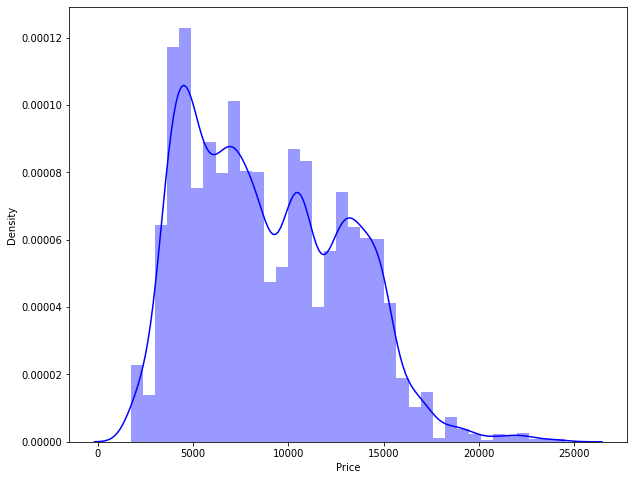

In [92]:
plt.figure(figsize=(10,8))
sns.distplot(data['Price'],color='Blue');

In [93]:
X=data.drop('Price',axis=1)
X.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,1,5,50,13,15
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,6,9,9,25,4,25
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5,12,18,5,23,30
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,3,1,16,50,21,35


In [94]:
y=data['Price']

In [95]:
from sklearn.feature_selection import SelectFromModel

In [96]:
from sklearn.linear_model import Lasso

### Feature selection                                                                                                                                                                 
Finding the Best Feature

In [97]:
feature_model = SelectFromModel(Lasso(alpha=0.2, random_state=0)) # remember to set the seed, the random state in this function
feature_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.2, random_state=0))

In [98]:
feature_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True])

In [99]:
cols=X.columns

In [100]:
selected = cols[(feature_model.get_support())]

In [101]:
selected

Index(['Total_Stops', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Delhi', 'Kolkata', 'Mumbai', 'Delhi',
       'Hyderabad', 'New Delhi', 'Journey_day', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [102]:
x=X[selected]

### Train and Split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

In [105]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7156, 26)
X_test shape is  (3526, 26)
y_train shape is  (7156,)
y_test shape is  (3526,)


In [106]:
data.shape

(10682, 28)

In [107]:
data.columns

Index(['Total_Stops', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

### Applying Mechine Learining Alogorithm

In [108]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [109]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
svm=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

In [110]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.5, random_state=42)
for i in[lr, dt, svm, knn, gb, rf]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score == test_score) <= 0.1:
        print(i)
        # print("at random state",)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is',mean_absolute_error(y_test, pred))
        print('Mean squared error is', mean_squared_error(y_test, pred))
        print('Root mean squared error is', (mean_squared_error(y_test, pred, squared=False)))
        print('***********************************************')

LinearRegression()
R2 score is  0.6311523981311056
R2 for train data 0.6255466241565755
Mean absolute error is 1853.7929623137522
Mean squared error is 6107703.0959805595
Root mean squared error is 2471.376761236651
***********************************************
DecisionTreeRegressor()
R2 score is  0.6885493522729432
R2 for train data 0.9761406199156439
Mean absolute error is 1325.562469574986
Mean squared error is 5157273.832686711
Root mean squared error is 2270.9631949212016
***********************************************
SVR()
R2 score is  -0.009251695793365489
R2 for train data -0.017168313422025516
Mean absolute error is 3430.2787414966424
Mean squared error is 16712077.497014103
Root mean squared error is 4088.040789548718
***********************************************
KNeighborsRegressor()
R2 score is  0.47430400228327574
R2 for train data 0.6590373488281238
Mean absolute error is 2193.72967609062
Mean squared error is 8704936.826294702
Root mean squared error is 2950.4129924

##### The best Regressor is RandomForestRegressor with the accuracy 